In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 



In [2]:
df = pd.read_csv("Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
fraudPercentage = df.isFraud.value_counts(normalize=True)
print("Percentage of Non-Fraudulent and Fraudulent Transactions:\n{}".format(fraudPercentage*100))

Percentage of Non-Fraudulent and Fraudulent Transactions:
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


In [5]:
print(df.type.unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [6]:
print("Percentage of each individual type of transactions:")
print((df.type.value_counts()/df.type.value_counts().sum())*100)

Percentage of each individual type of transactions:
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


In [7]:
df.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
df.duplicated().sum()

0

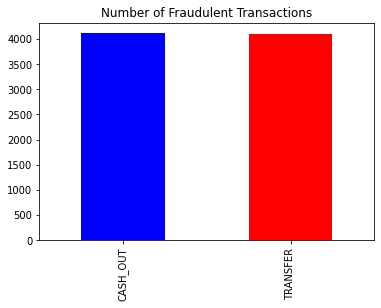

In [9]:
df.type[df.isFraud == 1].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Number of Fraudulent Transactions");

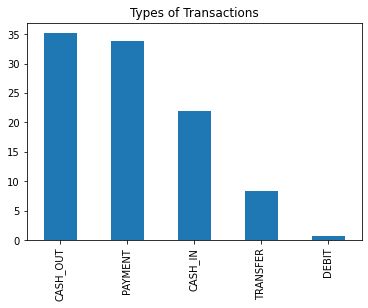

In [10]:
((df.type.value_counts()/df.type.value_counts().sum())*100).plot(kind="bar")
plt.title("Types of Transactions");\
plt.ylabel("");

In [11]:
print("Maximum Transaction amount:", df.amount.max())
print("Minimum Transaction amount:", df.amount.min())
print("Average Transaction amount:", round(df.amount.mean(),2))

Maximum Transaction amount: 92445516.64
Minimum Transaction amount: 0.0
Average Transaction amount: 179861.9


In [12]:
print("\nMaximum Amount Transaction occurend for transaction:", df.type[df.amount == df.amount.max()])
print("\nMaximum CASH_OUT Transaction amount:", df.amount[df.type=="CASH_OUT"].max())
print("Minimum CASH_OUT Transaction amount:", df.amount[df.type=="CASH_OUT"].min())
print("Average CASH_OUT Transaction amount:", round(df.amount[df.type=="CASH_OUT"].mean(),2))


Maximum Amount Transaction occurend for transaction: 3686583    TRANSFER
Name: type, dtype: object

Maximum CASH_OUT Transaction amount: 10000000.0
Minimum CASH_OUT Transaction amount: 0.0
Average CASH_OUT Transaction amount: 176273.96


In [13]:
print("\nMaximum TRANSFER Transaction amount:", df.amount[df.type=="TRANSFER"].max())
print("Minimum TRANSFER Transaction amount:", df.amount[df.type=="TRANSFER"].min())
print("Average TRANSFER Transaction amount:", round(df.amount[df.type=="TRANSFER"].mean(),2))


Maximum TRANSFER Transaction amount: 92445516.64
Minimum TRANSFER Transaction amount: 2.6
Average TRANSFER Transaction amount: 910647.01


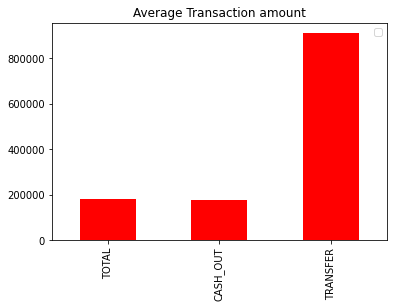

In [14]:
avg = {"TOTAL":round(df.amount.mean(),2),
       "CASH_OUT": round(df.amount[df.type=="CASH_OUT"].mean(),2),
       "TRANSFER": round(df.amount[df.type=="TRANSFER"].mean(),2)
    }

pd.DataFrame(avg.values(), index=avg.keys()).plot(kind="bar", color="red")

plt.title("Average Transaction amount")
plt.legend("");

In [15]:
flagged = df[df.isFlaggedFraud==1]
flagged.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [16]:
print("The Number of Transactions that are flagged to be fraud are:", len(flagged))

The Number of Transactions that are flagged to be fraud are: 16


In [17]:
flagged.isFraud

2736446    1
3247297    1
3760288    1
5563713    1
5996407    1
5996409    1
6168499    1
6205439    1
6266413    1
6281482    1
6281484    1
6296014    1
6351225    1
6362460    1
6362462    1
6362584    1
Name: isFraud, dtype: int64

In [18]:
flagged.amount.min(), flagged.amount.max()

(353874.22, 10000000.0)

In [19]:
fraud = df[df.isFraud == 1]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [20]:
print(f"There are a total of {len(fraud)} Fraudulent Transactions in the dataset.")

There are a total of 8213 Fraudulent Transactions in the dataset.


In [21]:
print(f"A total of {round((len(flagged)/len(fraud)) * 100,2)} % of Fraudulent Transactions were Flagged.")


A total of 0.19 % of Fraudulent Transactions were Flagged.


In [22]:
print(str(len(df[df.newbalanceOrig == 0])) + " Transactions had the entire balance of the sender emptied. ie newbalanceOrig = 0")

3609566 Transactions had the entire balance of the sender emptied. ie newbalanceOrig = 0


In [23]:
print(str(len(df[df.oldbalanceDest == 0])) + " Customers had zero balance before Transaction. ie oldbalanceDest = 0")

2704388 Customers had zero balance before Transaction. ie oldbalanceDest = 0


In [24]:
df.isFraud[df.newbalanceOrig==0].value_counts()

0    3601513
1       8053
Name: isFraud, dtype: int64

In [25]:
df.isFraud[df.oldbalanceDest==0].value_counts()

0    2699037
1       5351
Name: isFraud, dtype: int64

In [26]:
len(fraud)

8213

In [27]:
len(fraud), df.isFraud[df.newbalanceOrig==0].sum()

(8213, 8053)

In [28]:
len(fraud), df.isFraud[df.oldbalanceDest==0].sum()

(8213, 5351)

In [29]:
print(f"In {round(df.isFraud[df.newbalanceOrig==0].sum()/len(fraud) * 100,2)} % of Fraudulent Transaction the entire balance of the sender(origin) was emptied")


In 98.05 % of Fraudulent Transaction the entire balance of the sender(origin) was emptied


In [30]:
print(f"In {round(df.isFraud[df.oldbalanceDest==0].sum()/len(fraud) * 100,2)} % of Fraudulent Transaction the balance of the recepient was empty before the transaction.")


In 65.15 % of Fraudulent Transaction the balance of the recepient was empty before the transaction.


In [31]:
pd.DataFrame({df.isFraud[df.newbalanceOrig==0].sum(),len(fraud)}, index=["Total Fraud", "Zero New Bal Orig"]).T


,Total Fraud,Zero New Bal Orig
0,8213,8053


In [32]:
pd.DataFrame({df.isFraud[df.oldbalanceDest==0].sum(),len(fraud)}, index=["Total Fraud", "Zero old Bal Dest"]).T


,Total Fraud,Zero old Bal Dest
0,8213,5351


In [33]:
df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

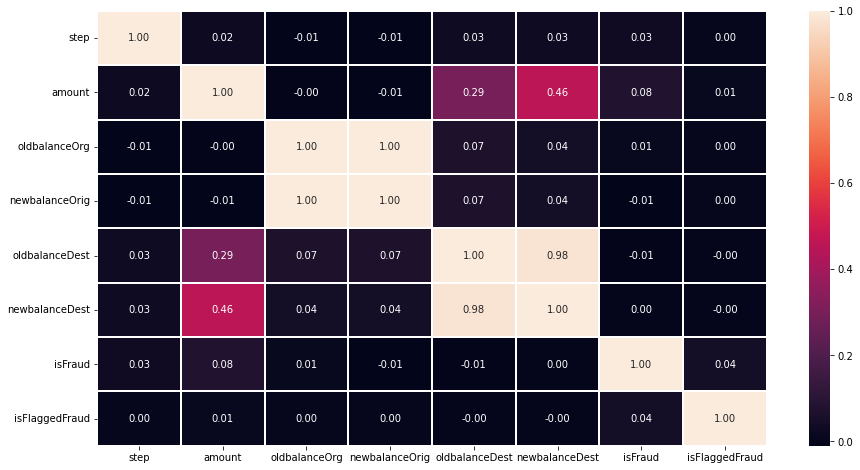

In [34]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.15,
            fmt=".2f")

In [35]:

X = df.drop("isFraud", axis=1)


y = df.isFraud.values

In [36]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [37]:
y[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [38]:
nameOrigin = []
for i in range(0, len(df)):
    nameOrigin.append(int(df.nameOrig[i].split("C")[1]))

In [39]:
len(nameOrigin), len(df)

(6362620, 6362620)

In [40]:
X.nameOrig = nameOrigin
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [41]:
nameDestination = []
for i in range(0, len(df)):
    if (df.nameDest[i][0] == 'M'):
        nameDestination.append(int(df.nameDest[i].split("M")[1]))
    else:
        nameDestination.append(int(df.nameDest[i].split("C")[1]))
    
len(nameDestination)

6362620

In [42]:
X.nameDest = nameDestination
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [44]:
X["type"] = X["type"].astype('category')
X["type"] = X["type"].cat.codes
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [45]:
np.random.seed(42) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [46]:
len(X_train),len(X_val),len(X_test)

(4072076, 1018020, 1272524)

In [48]:
models = {
          "RandomForestClassifier": RandomForestClassifier(verbose=2)
        }

def fit_and_score(models, X_train, X_test, X_val, y_train, y_test, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_val :   validation data
    X_test : training data
    y_train : labels assosciated with training data
    y_val : labels assosciated with validation data
    y_test : labels assosciated with test data
    """
    np.random.seed(80)
    model_scores = {}
    for name, model in models.items():
        model_scores["model"] = name
        model.fit(X_train, y_train)
        model_scores["validation score"] = model.score(X_test, y_test)
        model_scores["test score"] = model.score(X_test, y_test)
    return model_scores
        
model_scores = fit_and_score(models, X_train, X_test, X_val, y_train, y_test, y_val)

print("Model Scores:\n")
for name, score in model_scores.items():
    print("{}\t:\t{}".format(name,score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 22.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Model Scores:

model	:	RandomForestClassifier
validation score	:	0.9997013808776888
test score	:	0.9997013808776888


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished
